In [97]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [98]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### K Means

In [99]:
X = dataset.iloc[:, -2:].values # take last two columns

In [100]:
X[:5, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [101]:
m = X.shape[0]
n = X.shape[1]
n_iter = 1000
K = 5

In [102]:
centroids = np.zeros([n * K])
centroids = centroids.reshape(n, K)
# each column of this n x K matrix 
# is a centroid of one cluster

In [103]:
centroids

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [104]:
# pick random centroids
for k in range(K):
    rand = random.randint(0, m-1)
    centroids[:, k] = X[rand]

In [105]:
centroids

array([[60., 18., 48., 57., 65.],
       [42.,  6., 50., 55., 43.]])

In [106]:
output = {}

In [107]:
distance = np.zeros([m * K])
distance = distance.reshape(m, K)

In [108]:
for k in range(K):
    temp_distance = np.sum((X - centroids[:, k]) ** 2, axis = 1)
    distance[:, k] = temp_distance
    
# assign each sample to closest centroid
clusters = np.argmin(distance, axis = 1) + 1

In [109]:
clusters

array([2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 4, 2, 3, 2, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4,
       4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 5, 4, 4, 4, 1, 5, 5, 5, 5,
       4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5,
       5, 5])

In [110]:
C1 = np.where(clusters == 1) # indexes of the samples in cluster 1
C2 = np.where(clusters == 2) # indexes of the samples in cluster 2
C3 = np.where(clusters == 3) # indexes of the samples in cluster 3
C4 = np.where(clusters == 4) # indexes of the samples in cluster 4
C5 = np.where(clusters == 5) # indexes of the samples in cluster 5

In [111]:
Y1 = X[C1] # Group of samples in cluster1
Y2 = X[C2] # Group of samples in cluster2
Y3 = X[C3] # Group of samples in cluster3
Y4 = X[C4] # Group of samples in cluster4
Y5 = X[C5] # Group of samples in cluster5
C1 = Y1.mean(axis = 0) #mean value of cluster1
C2 = Y2.mean(axis = 0) #mean value of cluster2
C3 = Y3.mean(axis = 0) #mean value of cluster3
C4 = Y4.mean(axis = 0) #mean value of cluster4
C5 = Y5.mean(axis = 0) #mean value of cluster5

In [146]:
for i in range(n_iter):
    for k in range(K):
        temp_distance = np.sum((X - centroids[:, k]) ** 2, axis = 1)
        distance[:, k] = temp_distance

    clusters = np.argmin(distance, axis = 1) + 1
    C1 = np.where(clusters == 1)
    C2 = np.where(clusters == 2)
    C3 = np.where(clusters == 3)
    C4 = np.where(clusters == 4)
    C5 = np.where(clusters == 5)
    Y1 = X[C1]
    Y2 = X[C2]
    Y3 = X[C3]
    Y4 = X[C4]
    Y5 = X[C5]
    C1 = Y1.mean(axis = 0)
    C2 = Y2.mean(axis = 0)
    C3 = Y3.mean(axis = 0)
    C4 = Y4.mean(axis = 0)
    C5 = Y5.mean(axis = 0)
    
    centroids[:, 0] = C1
    centroids[:, 1] = C2
    centroids[:, 2] = C3
    centroids[:, 3] = C4
    centroids[:, 4] = C5

Text(0, 0.5, 'Number of transactions')

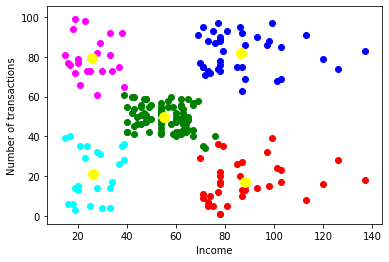

In [147]:
color = ['red', 'blue', 'green', 'cyan', 'magenta']
plt.scatter(Y1[:, 0], Y1[:, 1], c = color[0])
plt.scatter(Y2[:, 0], Y2[:, 1], c = color[1])
plt.scatter(Y3[:, 0], Y3[:, 1], c = color[2])
plt.scatter(Y4[:, 0], Y4[:, 1], c = color[3])
plt.scatter(Y5[:, 0], Y5[:, 1], c = color[4])
plt.scatter(C1[0], C1[1], s = 100, c = 'yellow')
plt.scatter(C2[0], C2[1], s = 100, c = 'yellow')
plt.scatter(C3[0], C3[1], s = 100, c = 'yellow')
plt.scatter(C4[0], C4[1], s = 100, c = 'yellow')
plt.scatter(C5[0], C5[1], s = 100, c = 'yellow')
plt.xlabel('Income')
plt.ylabel('Number of transactions')

### Vectorization

In [114]:
Y = {}

In [115]:
for k in range(K):
    Y[k + 1] = np.array([]).reshape(2, 0)
    
for i in range(m):
    Y[clusters[i]] = np.c_[Y[clusters[i]], X[i]]
    
for k in range(K):
    Y[k + 1] = Y[k + 1].T
    
for k in range(K):
    centroids[:, k] = np.mean(Y[k + 1], axis = 0)

In [116]:
Y

{1: array([[54., 42.],
        [54., 41.],
        [54., 44.],
        [54., 46.],
        [58., 46.],
        [59., 41.],
        [60., 40.],
        [60., 42.],
        [60., 47.],
        [61., 42.],
        [61., 49.],
        [62., 41.],
        [62., 42.]]), 2: array([[15., 39.],
        [16.,  6.],
        [18.,  6.],
        [19.,  3.],
        [19., 14.],
        [20., 15.],
        [20., 13.],
        [21., 35.],
        [23., 29.],
        [25.,  5.],
        [28., 14.],
        [30.,  4.],
        [33.,  4.],
        [33., 14.],
        [34., 17.]]), 3: array([[15., 81.],
        [16., 77.],
        [17., 40.],
        [17., 76.],
        [18., 94.],
        [19., 72.],
        [19., 99.],
        [20., 77.],
        [20., 79.],
        [21., 66.],
        [23., 98.],
        [24., 35.],
        [24., 73.],
        [25., 73.],
        [28., 82.],
        [28., 32.],
        [28., 61.],
        [29., 31.],
        [29., 87.],
        [30., 73.],
        [33., 81.],
        [

In [143]:
for i in range(n_iter):
    for k in range(K):
        
        temp_distance = np.sum((X - centroids[:, k]) ** 2, axis = 1)
        distance[:, k] = temp_distance

    clusters = np.argmin(distance, axis = 1) + 1

    for k in range(K):
        Y[k + 1] = np.array([]).reshape(2, 0)

    for i in range(m):
        Y[clusters[i]] = np.c_[Y[clusters[i]], X[i]]

    for k in range(K):
        Y[k + 1] = Y[k + 1].T

    for k in range(K):
        centroids[:, k] = np.mean(Y[k + 1], axis = 0)
            
    output = Y

Text(0.5, 1.0, 'Plot of data points')

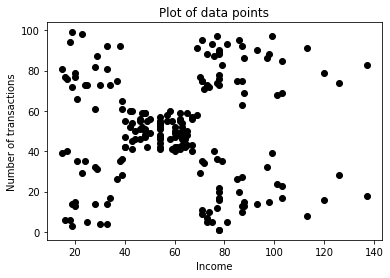

In [144]:
plt.scatter(X[:, 0], X[:, 1], c = 'black')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.title('Plot of data points')

Text(0, 0.5, 'Number of transactions')

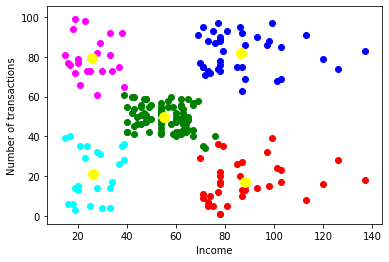

In [145]:
color = ['red', 'blue', 'green', 'cyan', 'magenta']

for k in range(K):
    plt.scatter(output[k + 1][:, 0], output[k + 1][:, 1], c = color[k])
    
plt.scatter(centroids[0, :], centroids[1, :], s = 100, c = 'yellow')
plt.xlabel('Income')
plt.ylabel('Number of transactions')

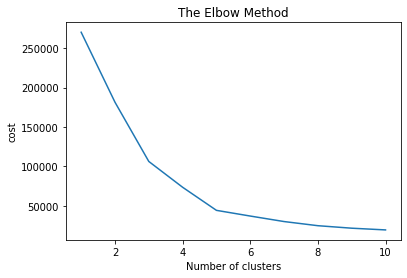

In [142]:
# implementing the same algorithm using the sklearn library
# with the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

cost = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cost)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show()